In [2]:
import pandas as pd
data=pd.read_csv("books_task.csv")


In [3]:
data.head()

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
0,0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],Smithsonian Institution,1996,['Comics & Graphic Novels'],784.303924
1,1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],825.465535
2,2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],OUP USA,2000,['Religion'],841.705321
3,3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],666.426542
4,5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],806.216143


In [4]:
print(data.shape)
print(data['Title'].nunique())
print(data['description'].nunique())
print(data['publishedDate'].nunique())

print(data['authors'].nunique())
print(data['publisher'].nunique())
print(data['categories'].nunique())




(138724, 8)
138724
116931
10819
97801
12855
100


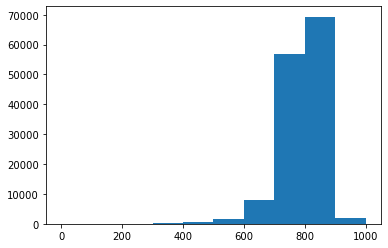

In [5]:
import matplotlib.pyplot as plt
plt.hist(data['Impact']);

In [78]:
data['Impact'].describe()

count    138724.000000
mean        786.763662
std          63.640350
min           0.000000
25%         763.039309
50%         805.568540
75%         819.108336
max        1000.000000
Name: Impact, dtype: float64

In [93]:
data[data.Impact<100]

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
22626,31363,"Crossroads of Twilight (The Wheel of Time, Boo...",The Wheel of Time ® is a PBS Great American Re...,['Robert Jordan'],Tor Fantasy,2010-07-20,['Fiction'],0.000000
89337,134635,Day of Reckoning: The Massacre at Columbine Hi...,"Who was the evilest of the evil, the baddest o...",['Martin Gilman Wolcott'],Citadel Press,2004,['History'],5.333957
136418,207153,Predator (Kay Scarpetta Mysteries),Kay Scarpetta and her colleague Pete Marino in...,['Patricia Daniels Cornwell'],Berkley,2012,['Fiction'],30.556660


In [83]:
63.640350/786.763662*100

8.088877648240954

Null Values

In [6]:
data['description'].isna().value_counts(normalize=True).mul(100)

False    90.809809
True      9.190191
Name: description, dtype: float64

In [7]:
data['Title'].isna().value_counts(normalize=True).mul(100)

False    100.0
Name: Title, dtype: float64

In [8]:
data['authors'].isna().value_counts(normalize=True).mul(100)

False    98.03711
True      1.96289
Name: authors, dtype: float64

In [9]:
data['publisher'].isna().value_counts(normalize=True).mul(100)

False    100.0
Name: publisher, dtype: float64

In [10]:
data['publishedDate'].isna().value_counts(normalize=True).mul(100)

False    99.749142
True      0.250858
Name: publishedDate, dtype: float64

In [11]:
data['categories'].isna().value_counts(normalize=True).mul(100)

False    100.0
Name: categories, dtype: float64

In [13]:
# data.groupby('categories',as_index=False)['Impact'].mean().plot()

Authors

In [14]:
import numpy as np

In [22]:
authors_count=data.groupby('authors',as_index=False)['Title'].nunique()

In [26]:
authors_count['Title'].value_counts(normalize=True).mul(100)

1      82.698541
2      10.605209
3       3.142095
4       1.291398
5       0.671772
6       0.414106
7       0.274026
8       0.199384
9       0.137013
10      0.105316
11      0.072596
13      0.061349
12      0.052147
14      0.039877
15      0.037832
16      0.026585
17      0.018405
18      0.016360
20      0.014315
22      0.011247
19      0.009202
28      0.009202
21      0.008180
25      0.007157
36      0.006135
26      0.006135
29      0.005112
30      0.005112
32      0.005112
24      0.005112
23      0.005112
31      0.004090
51      0.003067
27      0.003067
33      0.003067
39      0.002045
40      0.002045
61      0.002045
41      0.002045
35      0.002045
164     0.001022
37      0.001022
103     0.001022
56      0.001022
34      0.001022
236     0.001022
49      0.001022
100     0.001022
109     0.001022
55      0.001022
48      0.001022
42      0.001022
58      0.001022
60      0.001022
45      0.001022
Name: Title, dtype: float64

In [49]:
authors_impact=data.groupby('authors',as_index=False)['Impact'].mean()

In [50]:
authors_df=authors_count.merge(authors_impact)

In [64]:
authors_df.corr()

,Title,Impact
Title,1.000000,-0.012602
Impact,-0.012602,1.000000


In [51]:
authors_df[authors_df.Title==1]['Impact'].describe()

count    80880.000000
mean       788.192894
std         59.095568
min        126.875445
25%        767.147946
50%        805.568540
75%        819.108336
max        997.901870
Name: Impact, dtype: float64

In [52]:
authors_df[authors_df.Title==2]['Impact'].describe()

count    10372.000000
mean       786.210688
std         52.250613
min        248.060358
25%        764.219347
50%        794.936232
75%        815.191177
max        983.672175
Name: Impact, dtype: float64

In [53]:
authors_df[authors_df.Title>2]['Impact'].describe()

count    6549.000000
mean      783.841704
std        46.887148
min       396.397233
25%       763.037017
50%       790.789906
75%       811.932606
max       956.340035
Name: Impact, dtype: float64

In [57]:
np.percentile(authors_df['Title'],99.99)

55.21999999998661

In [58]:
authors_df[authors_df.Title>=55]['Impact'].describe()

count     11.000000
mean     790.211087
std       13.178359
min      772.991841
25%      780.129469
50%      790.529270
75%      798.971252
max      814.090917
Name: Impact, dtype: float64

Publisher

In [59]:
publisher_count=data.groupby('publisher',as_index=False)['Title'].nunique()
publisher_count['Title'].value_counts(normalize=True).mul(100)

1       55.075846
2       12.889926
3        6.176585
4        4.014002
5        2.722676
          ...    
1959     0.007779
220      0.007779
555      0.007779
335      0.007779
1057     0.007779
Name: Title, Length: 252, dtype: float64

In [68]:
publisher_impact=data.groupby('publisher',as_index=False)['Impact'].mean()

In [69]:
publisher_df=publisher_count.merge(publisher_impact)

In [70]:
publisher_df.corr()

,Title,Impact
Title,1.000000,-0.012405
Impact,-0.012405,1.000000


In [84]:
print(publisher_df[publisher_df.Title==1]['Impact'].mean())
print(publisher_df[publisher_df.Title==2]['Impact'].mean())
print(publisher_df[publisher_df.Title==3]['Impact'].mean())
print(publisher_df[publisher_df.Title==4]['Impact'].mean())
print(publisher_df[publisher_df.Title==5]['Impact'].mean())
print(publisher_df[publisher_df.Title>5]['Impact'].mean())

792.7522557303572
791.8541819551334
791.1367114662329
792.4143615895473
790.6176582571879
787.7899407181638


In [85]:
print(publisher_df[publisher_df.Title==1]['Impact'].min())
print(publisher_df[publisher_df.Title==2]['Impact'].min())
print(publisher_df[publisher_df.Title==3]['Impact'].min())
print(publisher_df[publisher_df.Title==4]['Impact'].min())
print(publisher_df[publisher_df.Title==5]['Impact'].min())
print(publisher_df[publisher_df.Title>5]['Impact'].min())

199.51581474536815
488.73129765757153
575.5210914243964
596.8664137241922
551.1036677770946
593.6621022858504


In [91]:
print(publisher_df[publisher_df.Title==1]['Impact'].max())
print(publisher_df[publisher_df.Title==2]['Impact'].max())
print(publisher_df[publisher_df.Title==3]['Impact'].max())
print(publisher_df[publisher_df.Title==4]['Impact'].max())
print(publisher_df[publisher_df.Title==5]['Impact'].max())
print(publisher_df[publisher_df.Title>5]['Impact'].max())

997.9018702987848
931.7974055258048
888.9965101235533
915.3408544268334
873.479780485953
898.804634630236


In [86]:
publisher_df.sort_values(by='Title',ascending=False).head(10)

,publisher,Title,Impact
11114,Tan Books & Pub,3635,805.429809
10460,Simon and Schuster,3600,784.122762
10550,Smithsonian Institution,3216,788.289553
8820,Penguin,2788,775.029717
12488,Wm. B. Eerdmans Publishing,2563,814.085374
9879,Routledge,2371,783.711016
5996,John Wiley & Sons,1984,774.653936
4931,Harper Collins,1959,770.305872
2056,Cambridge University Press,1478,787.819167
70,A&C Black,1355,823.115348


Category

In [73]:
category_count=data.groupby('categories',as_index=False)['Title'].nunique()
category_count['Title'].value_counts(normalize=True).mul(100)

107     3.0
82      2.0
90      2.0
79      2.0
268     1.0
       ... 
114     1.0
4312    1.0
1162    1.0
98      1.0
595     1.0
Name: Title, Length: 95, dtype: float64

In [75]:
category_impact=data.groupby('categories',as_index=False)['Impact'].mean()

In [77]:
category_impact['Impact'].describe()

count    100.000000
mean     789.886084
std       11.136245
min      745.029266
25%      784.110630
50%      790.533875
75%      798.087692
max      812.227203
Name: Impact, dtype: float64

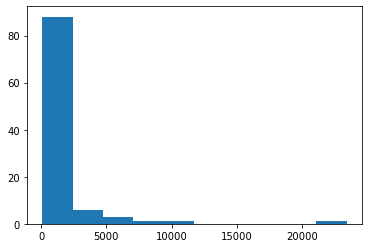

In [81]:
plt.hist(category_count['Title']);

In [82]:
category_count.sort_values(by='Title',ascending=False)

,categories,Title
49,['Fiction'],23419
84,['Religion'],9459
58,['History'],9330
63,['Juvenile Fiction'],6643
17,['Biography & Autobiography'],6324
...,...,...
28,['Christianity'],79
99,['Young Adult Nonfiction'],79
82,['Railroads'],78
20,['Brothers and sisters'],76


In [95]:
#######

In [ ]:
# Use NLP Features
# # Tf-Idf
# # Word Embedding for Vector Representation
# # Topic Modelling
# FIND Pairs of Author-Publisher , Author - Category , Publisher-Category having more/less impact when together(interacting Terms)
# Drop Description as it has 10% null
